<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [5]:
# normalize 
from sklearn.preprocessing import Normalizer

trans = Normalizer().fit(X_train)
X_train = trans.transform(X_train)
X_test =  trans.transform(X_test)

In [8]:
# import model and layers from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# instantiate model object and add layers
# use appropriate activation functions
# input
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))

# output
# regression model = single output node
model.add(Dense(1, activation='linear'))

In [9]:
# compile
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit
# report its accuracy in term of Mean Squared Error
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
13/13 [==============================] - 0s 2ms/step - loss: 314.9346 - mse: 314.9346 - val_loss: 315.7034 - val_mse: 315.7034
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 281.0627 - mse: 281.0627 - val_loss: 280.9657 - val_mse: 280.9657
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 248.2992 - mse: 248.2992 - val_loss: 246.7443 - val_mse: 246.7443
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 216.3169 - mse: 216.3169 - val_loss: 214.7812 - val_mse: 214.7812
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 187.2832 - mse: 187.2832 - val_loss: 185.5273 - val_mse: 185.5273
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 161.5305 - mse: 161.5305 - val_loss: 160.0778 - val_mse: 160.0778
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 139.9312 - mse: 139.9312 - val_loss: 139.1351 - val_mse: 139.1351
Epoch 8/20
13/13 [================

In [20]:
# train data error
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_train)
mean_squared_error(y_train, predictions)

84.92350761253687

In [21]:
# test data error
mean_squared_error(y_test, model.predict(X_test))

85.3070974279718

In [22]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

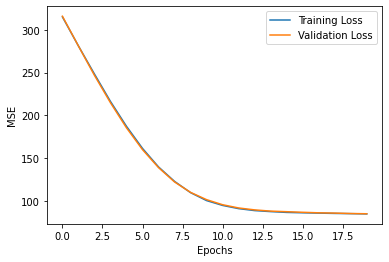

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend();

In [32]:
# put this data in a linear regression model to compare
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
lmodel_pred = lmodel.predict(X_train)

In [33]:
# training data error 
mean_squared_error(y_train, lmodel_pred)
# much better performance than my NN...

22.77423909605731

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [74]:
from tensorflow.keras.datasets import fashion_mnist
# load 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [75]:
# x are images y are labels/item descriptions
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

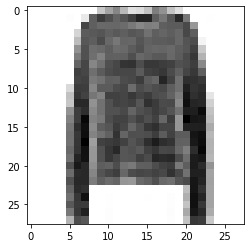

In [62]:
plt.imshow(X_train[767], cmap="binary")
# cool!

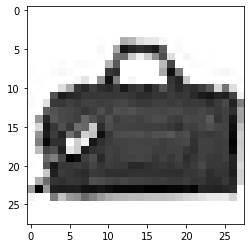

In [63]:
plt.imshow(X_train[1296],cmap="binary")

In [76]:
# instantiate
model = Sequential()
#input and hidden
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
# output
model.add(Dense(10, activation='softmax')) # same numer as the number of classes

In [79]:
# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
# fit 
model.fit(x=X_train, y=y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3539 - accuracy: 0.7502 - val_loss: 0.7219 - val_accuracy: 0.7440
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6683 - accuracy: 0.7856 - val_loss: 0.6727 - val_accuracy: 0.7578
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5530 - accuracy: 0.8134 - val_loss: 0.5451 - val_accuracy: 0.8108
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4742 - accuracy: 0.8343 - val_loss: 0.5274 - val_accuracy: 0.8221
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4381 - accuracy: 0.8459 - val_loss: 0.4981 - val_accuracy: 0.8362
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4298 - accuracy: 0.8506 - val_loss: 0.4899 - val_accuracy: 0.8257
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4095 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy:

In [81]:
hist = model.history.history

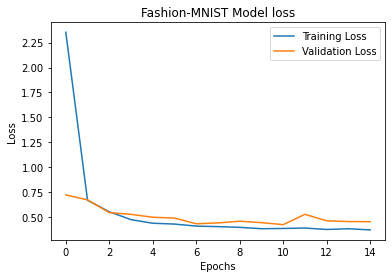

In [85]:
# graph
plt.plot(hist['loss'], label='Training Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fashion-MNIST Model loss')
plt.legend();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.